<a href="https://colab.research.google.com/github/hemalatha0303/apple-stock-RNN-predictor/blob/main/RNN_predicatingTimeSeriesData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


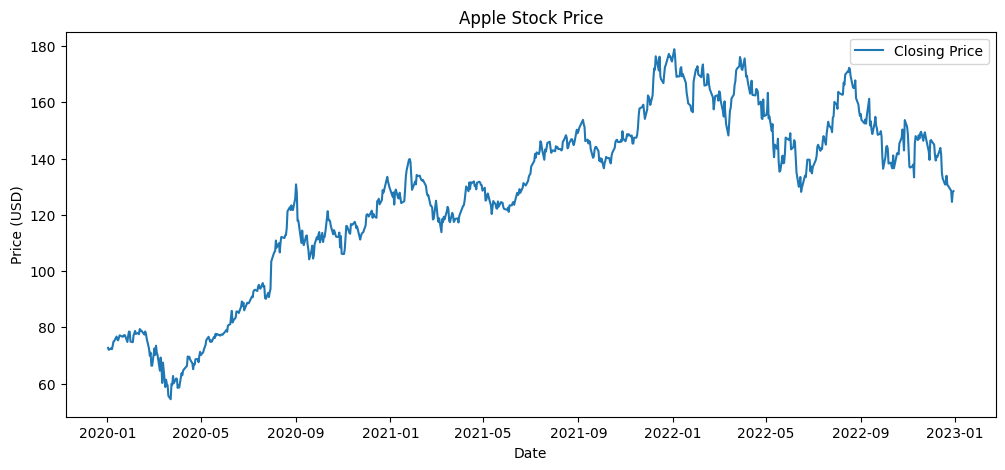

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Load stock data (Example: Apple stock)
df = yf.download('AAPL', start='2020-01-01', end='2023-01-01')

# Plot closing price
plt.figure(figsize=(12,5))
plt.plot(df['Close'], label='Closing Price')
plt.title('Apple Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [ ]:
print(df.head())
print(len(df))

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.716072  72.776598  71.466812  71.721019  135480400
2020-01-03  72.009117  72.771745  71.783962  71.941328  146322800
2020-01-06  72.582893  72.621631  70.876060  71.127851  118387200
2020-01-07  72.241539  72.849216  72.021223  72.592586  108872000
2020-01-08  73.403641  73.706271  71.943751  71.943751  132079200
756


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select closing price & normalize between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
df_scaled = scaler.fit_transform(df[['Close']])

# Convert to NumPy array
data = np.array(df_scaled)
#print(data)

# Define function to create sequences (X: input, y: next price)
def create_sequences(data, seq_length=50):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Create training sequences
sequence_length = 50
X, y = create_sequences(data, sequence_length)

# Split into train & test sets (80% training, 20% testing)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("Training shape:", X_train.shape, y_train.shape)
print("Testing shape:", X_test.shape, y_test.shape)

Training shape: (564, 50, 1) (564, 1)
Testing shape: (142, 50, 1) (142, 1)


In [ ]:
print(X[1])
print(y[1])

[[0.14111735]
 [0.14572858]
 [0.14298524]
 [0.15232464]
 [0.16485505]
 [0.16621697]
 [0.17911692]
 [0.17078933]
 [0.16818205]
 [0.17577036]
 [0.18256091]
 [0.17835827]
 [0.18055683]
 [0.18353379]
 [0.18174364]
 [0.16353193]
 [0.18053752]
 [0.19347634]
 [0.19256183]
 [0.1646215 ]
 [0.16296778]
 [0.18279439]
 [0.18785317]
 [0.19516906]
 [0.18656813]
 [0.18953282]
 [0.18574909]
 [0.20055213]
 [0.19600778]
 [0.19616395]
 [0.1845594 ]
 [0.19356985]
 [0.1870947 ]
 [0.17295497]
 [0.14395352]
 [0.1242553 ]
 [0.13316826]
 [0.0958586 ]
 [0.09554657]
 [0.14518215]
 [0.12667367]
 [0.15284704]
 [0.13369501]
 [0.12610817]
 [0.08152364]
 [0.11891147]
 [0.09958353]
 [0.04653477]
 [0.10453752]
 [0.03479388]]
[0.05556481]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RNN, Dense, SimpleRNNCell # Import SimpleRNNCell


# Build RNN model with custom cell
model = Sequential([
    RNN(SimpleRNNCell(50, activation='relu'), return_sequences=True, input_shape=(sequence_length, 1)), # Activation within SimpleRNNCell
    RNN(SimpleRNNCell(50, activation='relu')), # Activation within SimpleRNNCell
    Dense(1)  # Predict the next price
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rnn_1 (RNN)                          │ (None, 50, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rnn_2 (RNN)                          │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,701 (30.08 KB)

 Trainable params: 7,701 (30.08 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the RNN model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.1520 - val_loss: 0.0112
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0052 - val_loss: 0.0013
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.0414e-04 - val_loss: 0.0010
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 6.2742e-04 - val_loss: 9.7034e-04
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.2213e-04 - val_loss: 9.3370e-04
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 6.5129e-04 - val_loss: 9.0678e-04
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 5.0936e-04 - val_loss: 8.8882e-04
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 5.1769e-04 - val_loss: 8.6823e-04
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.7166e-04 - val_loss: 8.5127e-04
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 5.2224e-04 - val_loss: 0.0010
Epoch 1

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


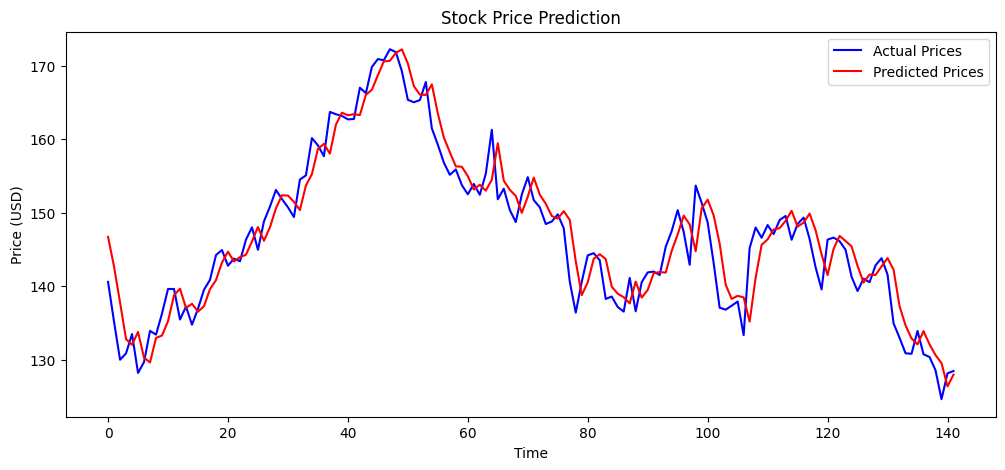

In [ ]:
# Predict on test data
predictions = model.predict(X_test)

# Convert predictions back to original scale
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot results
plt.figure(figsize=(12,5))
plt.plot(y_test_actual, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()